### Dados

###### Relatório das mudanças no deslocamento de comunidade em função da COVID-19

https://www.google.com/covid19/mobility/



**Aluno:** Artur Iury
**Matrícula:** 20170043750

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np


relatorio_mobilidade = pd.read_csv('2020_BR_Region_Mobility_Report.csv')
relatorio_mobilidade

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0
1,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0
2,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0
3,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0
4,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430427,BR,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,2020-10-12,NaN,NaN,NaN,NaN,-46.0,NaN
430428,BR,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,2020-10-13,NaN,NaN,NaN,NaN,3.0,NaN
430429,BR,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,2020-10-14,NaN,NaN,NaN,NaN,-1.0,NaN
430430,BR,Brazil,State of Tocantins,Tocantinópolis,NaN,NaN,NaN,2020-10-15,NaN,NaN,NaN,NaN,-2.0,NaN


In [8]:
relatorio_mobilidade_estados =relatorio_mobilidade.set_index('sub_region_1')
relatorio_mobilidade_paraiba = relatorio_mobilidade_estados.loc['State of Paraíba']

In [9]:
relatorio_mobilidade_paraiba

,country_region_code,country_region,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,,,,,,,,
State of Paraíba,BR,Brazil,NaN,NaN,BR-PB,NaN,2020-02-15,2.0,4.0,-20.0,6.0,4.0,1.0
State of Paraíba,BR,Brazil,NaN,NaN,BR-PB,NaN,2020-02-16,-7.0,4.0,-26.0,9.0,-1.0,3.0
State of Paraíba,BR,Brazil,NaN,NaN,BR-PB,NaN,2020-02-17,-7.0,-2.0,-13.0,7.0,17.0,-1.0
State of Paraíba,BR,Brazil,NaN,NaN,BR-PB,NaN,2020-02-18,-3.0,-3.0,-16.0,0.0,16.0,-1.0
State of Paraíba,BR,Brazil,NaN,NaN,BR-PB,NaN,2020-02-19,-4.0,-2.0,-14.0,3.0,14.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
State of Paraíba,BR,Brazil,Uiraúna,NaN,NaN,NaN,2020-10-12,NaN,NaN,NaN,NaN,-50.0,NaN
State of Paraíba,BR,Brazil,Uiraúna,NaN,NaN,NaN,2020-10-13,NaN,NaN,NaN,NaN,-1.0,NaN
State of Paraíba,BR,Brazil,Uiraúna,NaN,NaN,NaN,2020-10-14,NaN,NaN,NaN,NaN,-9.0,NaN


**Questão 1:** Dado **"relatorio_mobilidade_paraiba"** , qual a correlação entre mudança percentual nos locais de trabalho desde a linha de base(workplaces_percent_change_from_baseline) e mudança percentual da estação de trânsito da linha de base(transit_stations_percent_change_from_baseline)?


**Questão 2:** Qual o Percentual da mobilidade de Bobonieres e Farmácias (grocery_and_pharmacy_percent_change_from_baseline) de João Pessoa entre as datas de 20 Janeiro à 30 de Julho de 2020?

**Questão 3:** Qual a média percentual de varejo e recreação(retail_and_recreation_percent_change_from_baseline) de Cam

<AxesSubplot:xlabel='retail_and_recreation_percent_change_from_baseline', ylabel='grocery_and_pharmacy_percent_change_from_baseline'>

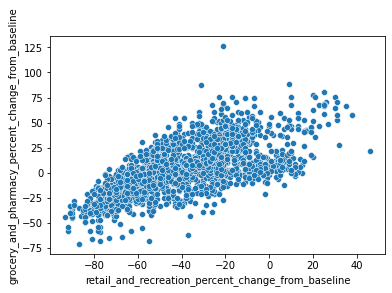

In [22]:
df= relatorio_mobilidade_paraiba[['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline']]
DF = df.dropna(axis=0, how='any')
sns.scatterplot(data=DF,x='retail_and_recreation_percent_change_from_baseline',y='grocery_and_pharmacy_percent_change_from_baseline')

<AxesSubplot:xlabel='retail_and_recreation_percent_change_from_baseline', ylabel='grocery_and_pharmacy_percent_change_from_baseline'>

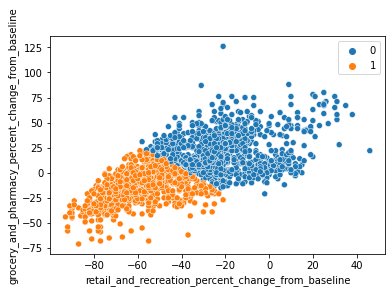

In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(DF)
sns.scatterplot(data=DF,x='retail_and_recreation_percent_change_from_baseline',y='grocery_and_pharmacy_percent_change_from_baseline', hue=kmeans.labels_)

<AxesSubplot:xlabel='retail_and_recreation_percent_change_from_baseline', ylabel='parks_percent_change_from_baseline'>

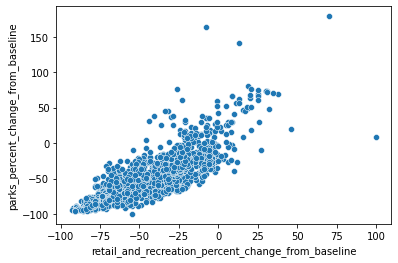

In [24]:
df= relatorio_mobilidade_paraiba[['retail_and_recreation_percent_change_from_baseline','parks_percent_change_from_baseline']]
DF = df.dropna(axis=0, how='any')
sns.scatterplot(data=DF,x='retail_and_recreation_percent_change_from_baseline',y='parks_percent_change_from_baseline')

<AxesSubplot:xlabel='retail_and_recreation_percent_change_from_baseline', ylabel='parks_percent_change_from_baseline'>

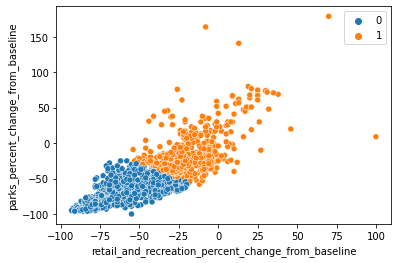

In [25]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(DF)
sns.scatterplot(data=DF,x='retail_and_recreation_percent_change_from_baseline',y='parks_percent_change_from_baseline', hue=kmeans.labels_)

<AxesSubplot:xlabel='residential_percent_change_from_baseline', ylabel='parks_percent_change_from_baseline'>

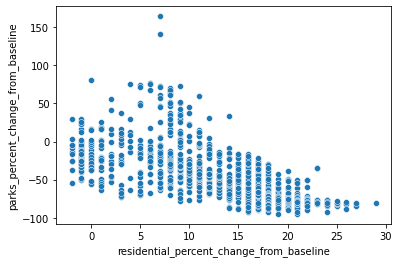

In [27]:
df= relatorio_mobilidade_paraiba[['residential_percent_change_from_baseline','parks_percent_change_from_baseline']]
DF = df.dropna(axis=0, how='any')
sns.scatterplot(data=DF,x='residential_percent_change_from_baseline',y='parks_percent_change_from_baseline')

<AxesSubplot:xlabel='residential_percent_change_from_baseline', ylabel='parks_percent_change_from_baseline'>

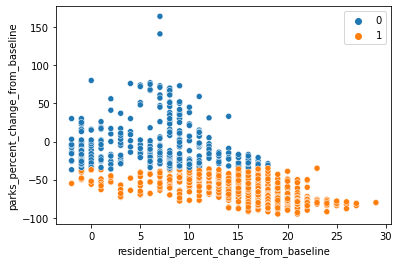

In [28]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(DF)
sns.scatterplot(data=DF,x='residential_percent_change_from_baseline',y='parks_percent_change_from_baseline', hue=kmeans.labels_)